In [39]:
# 1. Cargue en un Dataframe los datos de los accidentes de los 
# últimos 3 años
import pandas as pd 
df_2020 = pd.read_csv("../conjunto_de_datos/atus_anual_2020.csv", header = 0, index_col = False)
df_2021 = pd.read_csv("../conjunto_de_datos/atus_anual_2021.csv", header = 0, index_col = False)
df_2022 = pd.read_csv("../conjunto_de_datos/atus_anual_2022.csv", header = 0, index_col = False)

df_2020['ANIO'] = 2020
df_2021['ANIO'] = 2021
df_2022['ANIO'] = 2022

frames = [df_2020, df_2021, df_2022]

df = pd.concat(frames)

In [40]:
df.count()

COBERTURA       1067071
ID_ENTIDAD      1067071
ID_MUNICIPIO    1067071
ANIO            1067071
MES             1067071
ID_HORA         1067071
ID_MINUTO       1067071
ID_DIA          1067071
DIASEMANA       1067071
URBANA          1067071
SUBURBANA       1067071
TIPACCID        1067071
AUTOMOVIL       1067071
CAMPASAJ        1067071
MICROBUS        1067071
PASCAMION       1067071
OMNIBUS         1067071
TRANVIA         1067071
CAMIONETA       1067071
CAMION          1067071
TRACTOR         1067071
FERROCARRI      1067071
MOTOCICLET      1067071
BICICLETA       1067071
OTROVEHIC       1067071
CAUSAACCI       1067071
CAPAROD         1067071
SEXO            1067071
ALIENTO         1067071
CINTURON        1067071
ID_EDAD         1067071
CONDMUERTO      1067071
CONDHERIDO      1067071
PASAMUERTO      1067071
PASAHERIDO      1067071
PEATMUERTO      1067071
PEATHERIDO      1067071
CICLMUERTO      1067071
CICLHERIDO      1067071
OTROMUERTO      1067071
OTROHERIDO      1067071
NEMUERTO        

In [41]:
#2.  Agregue una columna tipo date que englobe las columnas 
# correspondientes a Año, Mes, Dia, Hora y Minuto.

# Iterar sobre cada fila del DataFrame
for index, row in df.iterrows():
    # Corregir las horas si es mayor de 23
    if row['ID_HORA'] > 23:
        row['ID_HORA'] = 0

    # Corregir los minutos si es mayor o igual a 60
    if row['ID_MINUTO'] >= 60:
        row['ID_MINUTO'] = 0

    # Validar y corregir los valores de mes y día
    if not isinstance(row['MES'], int) or row['MES'] > 12 or row['MES'] < 1:
        row['MES'] = 1
    
    if not isinstance(row['ID_DIA'], int) or row['ID_DIA'] > 31 or row['ID_DIA'] < 1:
        row['ID_DIA'] = 1

In [42]:
def corregir_valor(valor, minimo, maximo):
    if not str(valor).isdigit():
        return minimo
    valor = int(valor)
    if valor < minimo:
        return minimo
    elif valor > maximo:
        return maximo
    else:
        return valor

# Corregir los valores de mes, día, hora y minuto
df['MES'] = df['MES'].apply(lambda x: corregir_valor(x, 1, 12))
df['ID_DIA'] = df['ID_DIA'].apply(lambda x: corregir_valor(x, 1, 31))
df['ID_HORA'] = df['ID_HORA'].apply(lambda x: corregir_valor(x, 0, 23))
df['ID_MINUTO'] = df['ID_MINUTO'].apply(lambda x: corregir_valor(x, 0, 59))
df['ANIO'] = df['ANIO'].apply(lambda x: corregir_valor(x, 2020, 2022))

# Convertir las columnas 'ANIO', 'MES' e 'ID_DIA' en una columna tipo date
df['Fecha'] = pd.to_datetime(df['ANIO'].astype(str) + '-' + df['MES'].astype(str) + '-' + df['ID_DIA'].astype(str) + ' ' + df['ID_HORA'].astype(str) + ':' + df['ID_MINUTO'].astype(str), errors='coerce')

# Reemplazar los valores de día no válidos con 1
df['ID_DIA'] = df['ID_DIA'].apply(lambda x: 1 if not str(x).isdigit() or int(x) == 0 else int(x))

# Reemplazar los valores de mes no válidos con 1
df['MES'] = df['MES'].apply(lambda x: 1 if not str(x).isdigit() or int(x) == 0 else int(x))


# Mostrar el DataFrame con la nueva columna 'Fecha'
print(df[['ANIO', 'MES', 'ID_DIA', 'ID_HORA', 'ID_MINUTO', 'Fecha']])

        ANIO  MES  ID_DIA  ID_HORA  ID_MINUTO               Fecha
0       2020    1       1        0          0 2020-01-01 00:00:00
1       2020    1       1        0          0 2020-01-01 00:00:00
2       2020    1       1        0         10 2020-01-01 00:10:00
3       2020    1       1        2          0 2020-01-01 02:00:00
4       2020    1       1        2         10 2020-01-01 02:10:00
...      ...  ...     ...      ...        ...                 ...
392705  2022   12      30        7         45 2022-12-30 07:45:00
392706  2022   12      30        8          0 2022-12-30 08:00:00
392707  2022   12      30       17         20 2022-12-30 17:20:00
392708  2022   12      31       14         45 2022-12-31 14:45:00
392709  2022   12      31       22         15 2022-12-31 22:15:00

[1067071 rows x 6 columns]


In [43]:
#3.  Agregue una columna para Área cuyos valores serán Urbana o Suburbana 
# dependiendo del área donde ocurrió el accidente.

def asignar_area(valor):
    if valor == 'Sin accidente en esta zona':
        return 'Urbana'
    else:
        return 'Suburbana'

# Aplicar la función para crear la nueva columna 'Área'
df['Área'] = df['SUBURBANA'].apply(asignar_area)

# Mostrar el DataFrame filtrado
print(df[['Fecha','URBANA','SUBURBANA','Área']])

                     Fecha                     URBANA  \
0      2020-01-01 00:00:00  Accidente en intersección   
1      2020-01-01 00:00:00  Accidente en intersección   
2      2020-01-01 00:10:00  Accidente en intersección   
3      2020-01-01 02:00:00  Accidente en intersección   
4      2020-01-01 02:10:00  Accidente en intersección   
...                    ...                        ...   
392705 2022-12-30 07:45:00  Accidente en intersección   
392706 2022-12-30 08:00:00  Accidente en intersección   
392707 2022-12-30 17:20:00  Accidente en intersección   
392708 2022-12-31 14:45:00  Accidente en intersección   
392709 2022-12-31 22:15:00  Accidente en intersección   

                         SUBURBANA    Área  
0       Sin accidente en esta zona  Urbana  
1       Sin accidente en esta zona  Urbana  
2       Sin accidente en esta zona  Urbana  
3       Sin accidente en esta zona  Urbana  
4       Sin accidente en esta zona  Urbana  
...                            ...     ...  


In [44]:
#4.  Agregue una columna Zona cuyos valores serán la zona donde ocurrió el accidente

def asignar_zona(urbana, suburbana):
    if 'Sin accidente en esta zona' in suburbana:
        return urbana
    elif 'Sin accidente en esta zona' in urbana:
        return suburbana
    else:
        return None  # Devolver None si no se cumple ninguna condición

# Aplicar la función para crear la nueva columna 'Zona'
df['Zona'] = df.apply(lambda row: asignar_zona(row['URBANA'], row['SUBURBANA']), axis=1)

# Mostrar el DataFrame filtrado
print(df[['URBANA', 'SUBURBANA', 'Zona']])

                           URBANA                   SUBURBANA  \
0       Accidente en intersección  Sin accidente en esta zona   
1       Accidente en intersección  Sin accidente en esta zona   
2       Accidente en intersección  Sin accidente en esta zona   
3       Accidente en intersección  Sin accidente en esta zona   
4       Accidente en intersección  Sin accidente en esta zona   
...                           ...                         ...   
392705  Accidente en intersección  Sin accidente en esta zona   
392706  Accidente en intersección  Sin accidente en esta zona   
392707  Accidente en intersección  Sin accidente en esta zona   
392708  Accidente en intersección  Sin accidente en esta zona   
392709  Accidente en intersección  Sin accidente en esta zona   

                             Zona  
0       Accidente en intersección  
1       Accidente en intersección  
2       Accidente en intersección  
3       Accidente en intersección  
4       Accidente en intersección  
...

In [45]:
#5.  Elimine las columnas URBANA y SUBURBANA

# Eliminar las columnas 'URBANA' y 'SUBURBANA' 
df_modificado = df.drop(columns=['URBANA', 'SUBURBANA'])

# Mostrar el DataFrame modificado
print(df_modificado)

        COBERTURA  ID_ENTIDAD  ID_MUNICIPIO  ANIO  MES  ID_HORA  ID_MINUTO  \
0       Municipal           1             1  2020    1        0          0   
1       Municipal           1             1  2020    1        0          0   
2       Municipal           1             1  2020    1        0         10   
3       Municipal           1             1  2020    1        2          0   
4       Municipal           1             1  2020    1        2         10   
...           ...         ...           ...   ...  ...      ...        ...   
392705  Municipal          32            56  2022   12        7         45   
392706  Municipal          32            56  2022   12        8          0   
392707  Municipal          32            56  2022   12       17         20   
392708  Municipal          32            56  2022   12       14         45   
392709  Municipal          32            56  2022   12       22         15   

        ID_DIA  DIASEMANA                         TIPACCID  ...

In [46]:
#6.  Determine cual municipio de cada estado tuvo más meses sin accidentes

# Contar el número de meses sin accidentes en la zona urbana por estado y municipio
meses_sin_accidentes_urbana = df[df['URBANA'] == 'Sin accidente en esta zona'].groupby(['ID_ENTIDAD', 'ID_MUNICIPIO']).size()

# Contar el número de meses sin accidentes en la zona suburbana por estado y municipio
meses_sin_accidentes_suburbana = df[df['SUBURBANA'] == 'Sin accidente en esta zona'].groupby(['ID_ENTIDAD', 'ID_MUNICIPIO']).size()

# Combinar los resultados de las dos operaciones de agrupación
meses_sin_accidentes = meses_sin_accidentes_urbana.add(meses_sin_accidentes_suburbana, fill_value=0)

# Obtener el índice del municipio con el mayor número de meses sin accidentes por estado
municipio_mas_seguro = meses_sin_accidentes.groupby('ID_ENTIDAD').idxmax()

# Obtener el municipio con el mayor número de meses sin accidentes por estado
municipios_seguros = meses_sin_accidentes.loc[municipio_mas_seguro]

print(municipios_seguros.reset_index()[['ID_ENTIDAD', 'ID_MUNICIPIO']])

    ID_ENTIDAD  ID_MUNICIPIO
0            1             1
1            2             4
2            3             3
3            4             3
4            5            35
5            6             7
6            7            89
7            8            19
8            9            15
9           10             5
10          11            20
11          12             1
12          13            51
13          14            39
14          15            33
15          16            53
16          17             7
17          18            17
18          19            39
19          20            67
20          21           114
21          22            14
22          23             5
23          24            28
24          25             6
25          26            30
26          27             4
27          28            32
28          29            33
29          30            87
30          31            50
31          32            56


In [47]:
#7.   Resuma los accidentes del último año por tipo y que porcentaje representan

# Filtrar el DataFrame para obtener solo los datos del último año
ultimo_ano = df[df['ANIO'] == df['ANIO'].max()]

# Agrupar los datos por tipo de accidente y contar el número de accidentes de cada tipo
resumen_accidentes = ultimo_ano.groupby('TIPACCID').size().reset_index(name='Total')

# Calcular el porcentaje que representa cada tipo de accidente
total_accidentes = resumen_accidentes['Total'].sum()
resumen_accidentes['Porcentaje'] = (resumen_accidentes['Total'] / total_accidentes) * 100

# Mostrar el resumen de accidentes por tipo y porcentaje
print(resumen_accidentes)

                                 TIPACCID   Total  Porcentaje
0                       Caída de pasajero    1784    0.454279
1                        Certificado cero   15479    3.941585
2                     Colisión con animal    1022    0.260243
3                   Colisión con ciclista    4048    1.030786
4                Colisión con ferrocarril     268    0.068244
5                Colisión con motocicleta   53629   13.656133
6                Colisión con objeto fijo   47033   11.976522
7   Colisión con peatón (atropellamiento)   11066    2.817855
8         Colisión con vehículo automotor  229940   58.552112
9                                Incendio     348    0.088615
10                                   Otro    6325    1.610603
11                      Salida del camino   10857    2.764635
12                              Volcadura   10911    2.778386


In [48]:
#8.   Obtenga la cantidad de muertos y lesionados de los últimos 3 años

# Filtrar el DataFrame para obtener solo los datos de los últimos 3 años y los accidentes clasificados como fatales
ultimos_tres_anios = df[df['ANIO'].isin([2020,2021,2022])]

# Convertir las columnas relevantes a tipo numérico
ultimos_tres_anios[['CONDMUERTO', 'PASAMUERTO', 'PEATMUERTO', 'CICLMUERTO', 'OTROMUERTO', 'NEMUERTO', 'CONDHERIDO', 'PASAHERIDO', 'PEATHERIDO', 'CICLHERIDO', 'OTROHERIDO', 'NEHERIDO']] = \
ultimos_tres_anios[['CONDMUERTO', 'PASAMUERTO', 'PEATMUERTO', 'CICLMUERTO', 'OTROMUERTO', 'NEMUERTO', 'CONDHERIDO', 'PASAHERIDO', 'PEATHERIDO', 'CICLHERIDO', 'OTROHERIDO', 'NEHERIDO']].apply(pd.to_numeric, errors='coerce')

# Sumar el número de muertos en este período
total_muertos = (ultimos_tres_anios['CONDMUERTO'].sum() +
                 ultimos_tres_anios['PASAMUERTO'].sum() + 
                 ultimos_tres_anios['PEATMUERTO'].sum() + 
                 ultimos_tres_anios['CICLMUERTO'].sum() + 
                 ultimos_tres_anios['OTROMUERTO'].sum() + 
                 ultimos_tres_anios['NEMUERTO'].sum())

# Sumar el número de lesionados en este período
total_lesionados = (ultimos_tres_anios['CONDHERIDO'].sum() +
                    ultimos_tres_anios['PASAHERIDO'].sum() + 
                    ultimos_tres_anios['PEATHERIDO'].sum() +
                    ultimos_tres_anios['CICLHERIDO'].sum() +
                    ultimos_tres_anios['OTROHERIDO'].sum() +
                    ultimos_tres_anios['NEHERIDO'].sum())

# Mostrar el total de muertos y lesionados de los últimos 3 años
print("Muertos en accidentes fatales en los últimos 3 años:", total_muertos)
print("Lesionados en accidentes fatales en los últimos 3 años:", total_lesionados)


Muertos en accidentes fatales en los últimos 3 años: 13408
Lesionados en accidentes fatales en los últimos 3 años: 245902


In [49]:
#9.     ¿Cómo se compara el número de accidentes de cada año contra el anterior? 
#    ¿En qué porcentaje varió?

accid_anio = df.groupby('ANIO').size()
porcentaje_variacion = accid_anio.pct_change() * 100

# Mostrar los porcentajes de variación
print(porcentaje_variacion)

ANIO
2020          NaN
2021    12.032536
2022    10.214277
dtype: float64


In [50]:
# Seleccione una o dos características y haga una gráfica de cada una de las siguientes:
# Histograma, Dispersión, Línea
import matplotlib.pyplot as plt
import seaborn as sns


Valores únicos en la columna 'SEXO': ['Hombre' 'Se fugó' 'Mujer' 'Certificado cero']


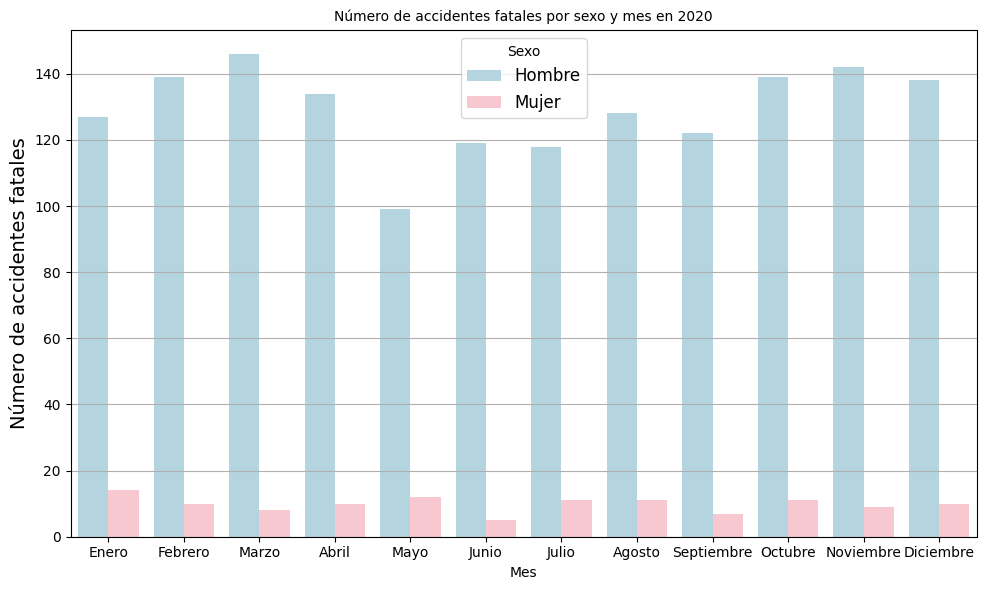

In [89]:
# Grafico HISTOGRAMA
# Numero de accidentes fatales por sexo y mes
dv = df_2020
# Verificar los valores únicos en la columna 'SEXO'
print("Valores únicos en la columna 'SEXO':", dv['SEXO'].unique())

# Filtrar solo los registros con sexo 'Hombre' o 'Mujer'
ds_filtrado = dv[dv['SEXO'].isin(['Hombre', 'Mujer'])]

# Agrupar por MES y SEXO y sumar los valores de CONDMUERTO (accidentes fatales)
accidentes_fatales = ds_filtrado.groupby(['MES', 'SEXO'])['CONDMUERTO'].sum().reset_index()

# Filtrar solo los accidentes fatales
accidentes_fatales = accidentes_fatales[accidentes_fatales['CONDMUERTO'] > 0]

# Crear un diccionario para mapear números de mes a nombres
meses = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
         5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
         9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}

# Reemplazar los números en la columna 'MES' con los nombres
accidentes_fatales['MES'] = accidentes_fatales['MES'].map(meses)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

# Cambiar el color de hombres a celeste
sns.barplot(x='MES', y='CONDMUERTO', hue='SEXO', data=accidentes_fatales, palette={'Hombre': 'lightblue', 'Mujer': 'pink'})  

plt.title('Número de accidentes fatales por sexo y mes en 2020', fontsize=10)
plt.xlabel('Mes', fontsize=10)
plt.ylabel('Número de accidentes fatales', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Sexo', fontsize=12)
plt.grid(axis='y')  # Añadir cuadrícula solo en el eje y
plt.tight_layout()

plt.show()



                                 TIPACCID  muertos  heridos
0                       Caída de pasajero        6        4
2                     Colisión con animal       12        5
3                   Colisión con ciclista        3        4
4                Colisión con ferrocarril        9        4
5                Colisión con motocicleta      581      102
6                Colisión con objeto fijo      399      109
7   Colisión con peatón (atropellamiento)       12    10010
8         Colisión con vehículo automotor      563      296
10                                   Otro       81       49
11                      Salida del camino      288       10
12                              Volcadura      380       40


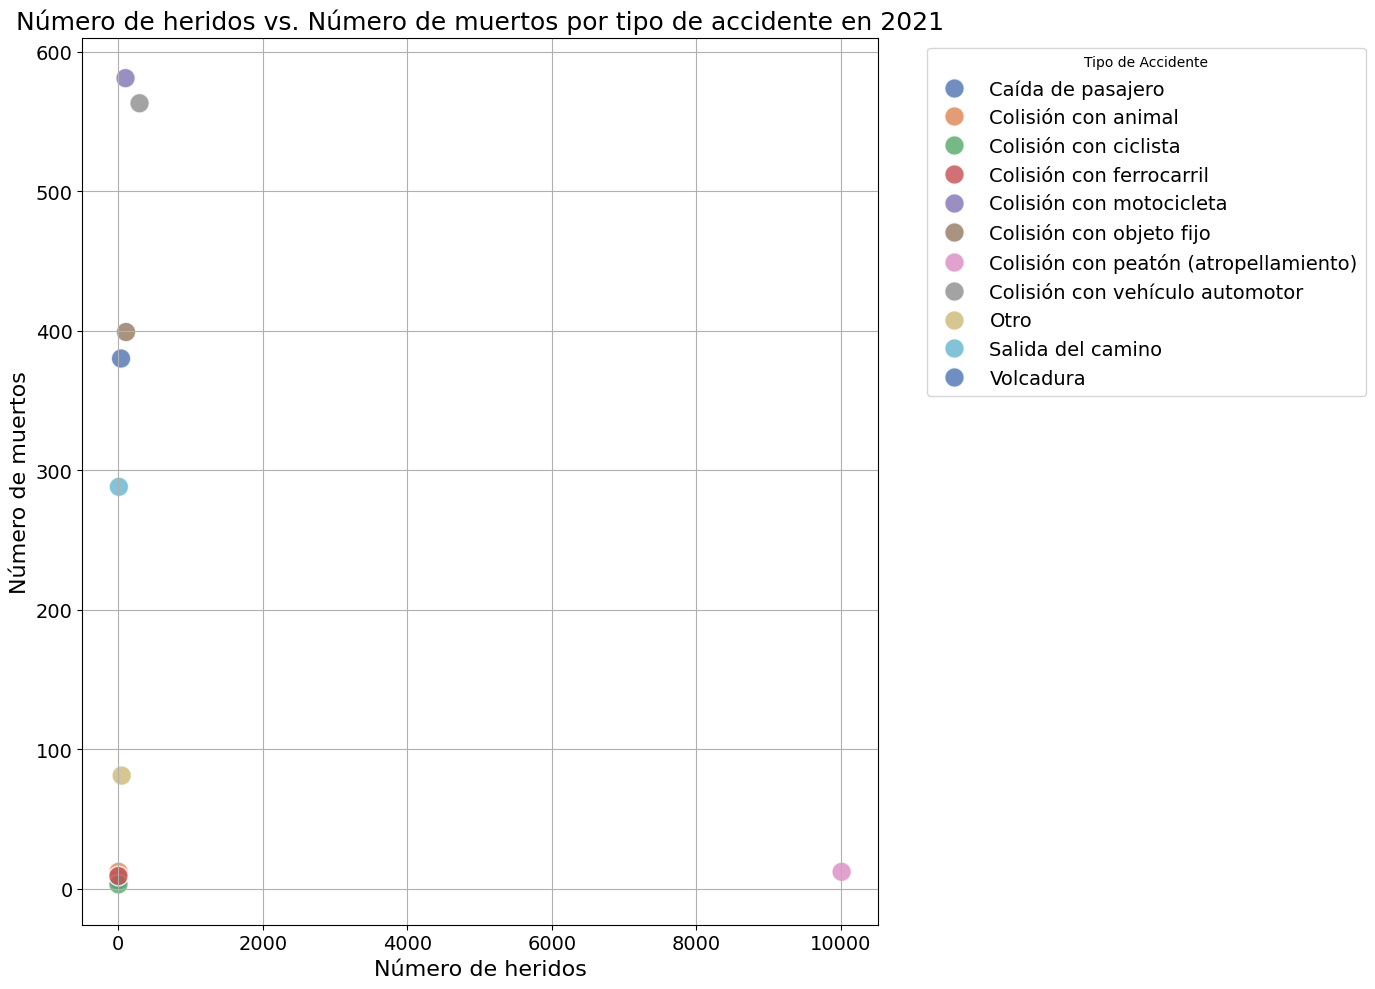

In [92]:
# Grafico DISPERSION 
# Número de heridos vs. Número de muertos por tipo de accidente en 2020

dv = df_2021
# Agrupar por TIPACCID y sumar los valores de CONDMUERTO y PEATHERIDO (heridos)
accidentes_resumen = dv.groupby('TIPACCID').agg(
    muertos=('CONDMUERTO', 'sum'),
    heridos=('PEATHERIDO', 'sum')
).reset_index()

# Eliminar filas con valores nulos o 0 en 'heridos' y 'muertos'
accidentes_resumen = accidentes_resumen.dropna(subset=['heridos', 'muertos'])
accidentes_resumen = accidentes_resumen[(accidentes_resumen['heridos'] > 0) & (accidentes_resumen['muertos'] > 0)]

# Verificar los datos agrupados
print(accidentes_resumen)

# Crear el gráfico de dispersión
plt.figure(figsize=(14, 10))  # Aumentar el tamaño del gráfico

# Gráfico de dispersión
scatter = sns.scatterplot(data=accidentes_resumen, x='heridos', y='muertos', hue='TIPACCID', 
                          palette='deep', s=200, alpha=0.8, edgecolor='w')

# Etiquetas y título
plt.title('Número de heridos vs. Número de muertos por tipo de accidente en 2021', fontsize=18)
plt.xlabel('Número de heridos', fontsize=16)
plt.ylabel('Número de muertos', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Ajustar la leyenda
plt.legend(title='Tipo de Accidente', fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

# Aplicar escala logarítmica si es necesario
# plt.xscale('log')
# plt.yscale('log')

plt.grid(True)  # Añadir cuadrícula
plt.tight_layout()

plt.show()




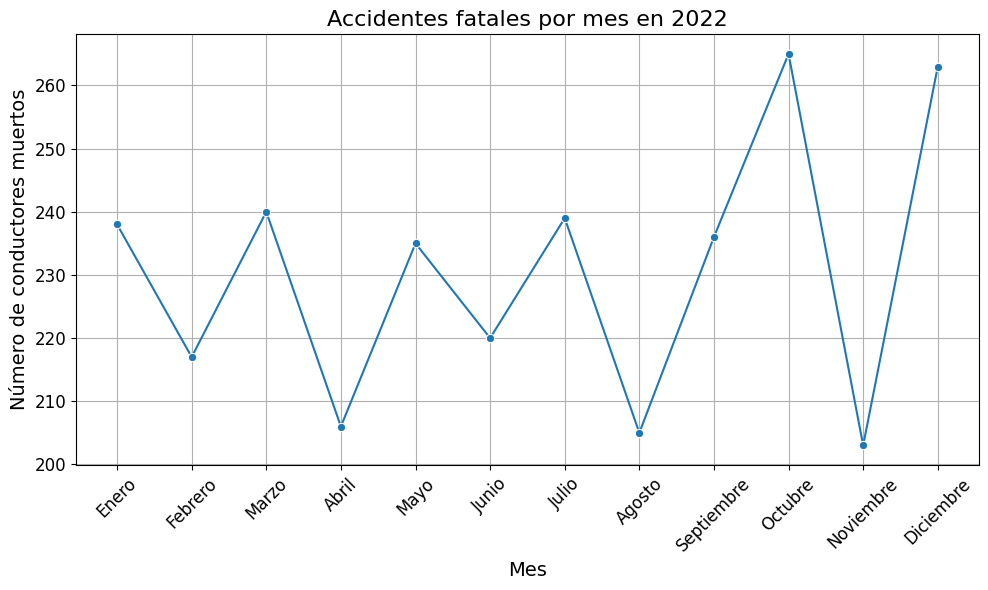

In [91]:
# Grafico LINEA
# Conductores muertos por mes
dv = df_2022
# Agrupar por mes y sumar los valores de 'CONDMUERTO'
ds_grouped = dv.groupby('MES')['CONDMUERTO'].sum().reset_index()

# Filtrar filas donde 'CONDMUERTO' tenga valores nulos o sean 0
ds_grouped = ds_grouped[ds_grouped['CONDMUERTO'] > 0]

# Mapeo de números de mes a nombres
meses = {
    1: "Enero",
    2: "Febrero",
    3: "Marzo",
    4: "Abril",
    5: "Mayo",
    6: "Junio",
    7: "Julio",
    8: "Agosto",
    9: "Septiembre",
    10: "Octubre",
    11: "Noviembre",
    12: "Diciembre"
}

# Cambiar los números de mes por sus nombres
ds_grouped['MES'] = ds_grouped['MES'].map(meses)

# Gráfico de línea de accidentes fatales por mes
plt.figure(figsize=(10, 6))
sns.lineplot(x='MES', y='CONDMUERTO', data=ds_grouped, marker='o')
plt.title('Accidentes fatales por mes en 2022', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Número de conductores muertos', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotar etiquetas para mejor visualización
plt.yticks(fontsize=12)
plt.grid(True)  # Añadir una cuadrícula para facilitar la lectura
plt.tight_layout()

plt.show()